# Goal: Determine quality of a car

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

## Analyze Dataset

In [2]:
car_data = pd.read_csv('car_data.csv')

car_data.describe()

,buying,maint,doors,persons,lug_boot,safety,quality
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


med      432
high     432
low      432
vhigh    432
Name: buying, dtype: int64

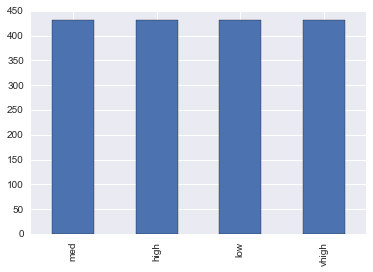

In [3]:
car_data.buying.value_counts().plot(kind='bar');
car_data['buying'].value_counts()

In [4]:
for col in car_data.columns:
    print col, "data"
    print car_data[col].value_counts(), "\n"

buying data
med      432
high     432
low      432
vhigh    432
Name: buying, dtype: int64 

maint data
med      432
high     432
low      432
vhigh    432
Name: maint, dtype: int64 

doors data
3        432
5more    432
4        432
2        432
Name: doors, dtype: int64 

persons data
more    576
4       576
2       576
Name: persons, dtype: int64 

lug_boot data
med      576
small    576
big      576
Name: lug_boot, dtype: int64 

safety data
med     576
high    576
low     576
Name: safety, dtype: int64 

quality data
unacc    1210
acc       384
good       69
vgood      65
Name: quality, dtype: int64 



Looks like the data has equal values for each feature.  Quality (the category) is skewed

## Learning

In [5]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
le = preprocessing.LabelEncoder()
le_car_data = car_data.apply(le.fit_transform)
le_car_data.describe()

,buying,maint,doors,persons,lug_boot,safety,quality
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [7]:
# Get X and y
X = le_car_data.values[:,:-1]
y = le_car_data.quality.values

print "X: \n", X[:5]
print "X shape: ", X.shape
print "y: ", y[:5]
print "y shape: ", y.shape

X: 
[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 [3 3 0 0 1 1]
 [3 3 0 0 1 2]]
X shape:  (1728, 6)
y:  [2 2 2 2 2]
y shape:  (1728,)


In [8]:
# Now split the data into train & test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75, random_state=42)

### Random Forest

In [9]:
# Now build the random forest classifier
params = {'n_estimators':200, 'max_depth':8, 'random_state':42}
rf_classifier = RandomForestClassifier(**params)
rf_classifier.fit(X_train, y_train)
y_test_pred = rf_classifier.predict(X_test)

In [10]:
confusion_mat = confusion_matrix(y_test, y_test_pred)
target_names = le.inverse_transform([0,1,2,3])
print confusion_mat
print classification_report(y_test, y_test_pred, target_names=target_names)

[[ 90   2  10   1]
 [  6   8   0   1]
 [  0   0 294   0]
 [  2   0   0  18]]
             precision    recall  f1-score   support

        acc       0.92      0.87      0.90       103
       good       0.80      0.53      0.64        15
      unacc       0.97      1.00      0.98       294
      vgood       0.90      0.90      0.90        20

avg / total       0.95      0.95      0.95       432



In [11]:
num_validations = 5
precision = model_selection.cross_val_score(rf_classifier, X_test, y_test, scoring='precision_weighted', cv=num_validations)
recall = model_selection.cross_val_score(rf_classifier, X_test, y_test, scoring='recall_weighted', cv=num_validations)
accuracy = model_selection.cross_val_score(rf_classifier, X_test, y_test, scoring='accuracy', cv=num_validations)
f1 = model_selection.cross_val_score(rf_classifier, X_test, y_test, scoring='f1_weighted', cv=num_validations)

print "Precision: " + str(round(100*precision.mean(), 2)) + "%"
print "Recall   : " + str(round(100*recall.mean(), 2)) + "%"
print "Accuracy : " + str(round(100*accuracy.mean(), 2)) + "%"
print "F1       : " + str(round(100*f1.mean(), 2)) + "%"

/Users/bergsfamily/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/bergsfamily/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 88.64%
Recall   : 89.6%
Accuracy : 89.6%
F1       : 88.63%


### Naive Bayes

In [12]:
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X_train, y_train)
y_test_pred = classifier_gaussiannb.predict(X_test)

In [13]:
confusion_mat = confusion_matrix(y_test, y_test_pred)
target_names = le.inverse_transform([0,1,2,3])
print confusion_mat
print classification_report(y_test, y_test_pred, target_names=target_names)

[[ 10   0  42  51]
 [  3   0   4   8]
 [  5   0 243  46]
 [  0   0   0  20]]
             precision    recall  f1-score   support

        acc       0.56      0.10      0.17       103
       good       0.00      0.00      0.00        15
      unacc       0.84      0.83      0.83       294
      vgood       0.16      1.00      0.28        20

avg / total       0.71      0.63      0.62       432



/Users/bergsfamily/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
num_validations = 5
precision = model_selection.cross_val_score(classifier_gaussiannb, X_test, y_test, scoring='precision_weighted', cv=num_validations)
recall = model_selection.cross_val_score(classifier_gaussiannb, X_test, y_test, scoring='recall_weighted', cv=num_validations)
accuracy = model_selection.cross_val_score(classifier_gaussiannb, X_test, y_test, scoring='accuracy', cv=num_validations)
f1 = model_selection.cross_val_score(classifier_gaussiannb, X_test, y_test, scoring='f1_weighted', cv=num_validations)

print "Precision: " + str(round(100*precision.mean(), 2)) + "%"
print "Recall   : " + str(round(100*recall.mean(), 2)) + "%"
print "Accuracy : " + str(round(100*accuracy.mean(), 2)) + "%"
print "F1       : " + str(round(100*f1.mean(), 2)) + "%"

Precision: 68.48%
Recall   : 62.49%
Accuracy : 62.49%
F1       : 62.13%


Random forest perfomed much better, although I should probably do a stratified shuffle split to get the NB fitting better.